<a href="https://colab.research.google.com/github/FunmiSomoye/Spotify_Challenge/blob/main/Spotify_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Start**

###Import Data and Dependencies

#####Import Libraries and set Dependencies

In [ ]:
#set dependencies
#filter out warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
#basics
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import metrics

#####Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turing College/data.csv')
data.head().T

,0,1,2,3,4
filename,blues.00081.au,blues.00022.au,blues.00031.au,blues.00012.au,blues.00056.au
tempo,103.359,95.7031,151.999,184.57,161.499
beats,50,44,75,91,74
chroma_stft,0.38026,0.306451,0.253487,0.26932,0.391059
rmse,0.248262,0.113475,0.151571,0.119072,0.137728
spectral_centroid,2116.94,1156.07,1331.07,1361.05,1811.08
spectral_bandwidth,1956.61,1497.67,1973.64,1567.8,2052.33
rolloff,4196.11,2170.05,2900.17,2739.63,3927.81
zero_crossing_rate,0.127272,0.0586134,0.0429672,0.0691239,0.0754795
mfcc1,-26.9298,-233.861,-221.803,-207.208,-145.435


###Data Insights

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In this dataset, there are:
*   29 columns and 
*   1000 rows

There are no missing values in this dataset.

In [ ]:
#see number of unique values in each column
[(col, data[col].nunique()) for col in data]

[('filename', 1000),
 ('tempo', 35),
 ('beats', 81),
 ('chroma_stft', 986),
 ('rmse', 986),
 ('spectral_centroid', 986),
 ('spectral_bandwidth', 986),
 ('rolloff', 986),
 ('zero_crossing_rate', 985),
 ('mfcc1', 986),
 ('mfcc2', 986),
 ('mfcc3', 986),
 ('mfcc4', 986),
 ('mfcc5', 986),
 ('mfcc6', 986),
 ('mfcc7', 986),
 ('mfcc8', 986),
 ('mfcc9', 986),
 ('mfcc10', 986),
 ('mfcc11', 986),
 ('mfcc12', 986),
 ('mfcc13', 986),
 ('mfcc14', 986),
 ('mfcc15', 986),
 ('mfcc16', 986),
 ('mfcc17', 986),
 ('mfcc18', 986),
 ('mfcc19', 986),
 ('mfcc20', 986),
 ('label', 10)]

Prominently, there are:
*   10 labels (genres)
*   81 beats
*   35 tempo types




In [ ]:
#see class distribution (balance) in data
data.groupby('label')['filename'].count() #use any of the columns since there is no missing data

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: filename, dtype: int64

This is a balanced data set.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

*Column Definitions*<br/>
Ref: https://www.sciencedirect.com/topics/engineering/spectral-centroid<br/>
https://www.thekerneltrip.com/statistics/tsne-vs-pca/

**Tempo:** The speed at which a passage of music is played. Measured in beats-per-minutes (bpm) <br/>
**Beats:** Rythmic unit in music. A music piece's beat is its unchanging tempo, while the rhythm is a pattern in which a piece's notes flow.<br/>
**Chroma_stft:** Short Time Fourier Transform. 'Chroma' refers to the tonal (tone: steady periodic sound, typically characterised by its duration, pitch, intensity, and timbre) content of a musical audio signal in condensed form; closely relates to the twelve different pitch classes STFT is used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time <br/>
**rmse:** Root Mean Square Error. Measure of the differences between values (sample or population) predicted and values observed <br/>
The statistical average of a certain signal as analyzed in terms of its frequency content is its spectrum. <br/>
**Spectral Centroid:** Indicates where the "center of mass" of the spectrum is located. It has a robust connection with the impression of brightness of a sound. Higher values = brighter sounds. A higher value of SC corresponds to more energy of the signal being concentrated within higher frequencies. <br/>
**Spectral Bandwidth:** It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value <br/>
**Roll Off:** Roll-off is the steepness of a transmission function with frequency. Represents the frequency below which a certain percentage (usually 80%–90%) of the magnitude distribution of the spectrum is concentrated in the spectrum.  <br/>
**Zero Crossing Rate:** The rate at which the signal changes from positive to negative or back divided by the total length of the frame. <br/>
**MFCC:** Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. A portrayal of the short-term power spectrum of a sound, based on a linear cosine transform of a log range spectrum on a nonlinear Mel scale of frequency. The extraction usually involves applying the Fourier transform of the signal. Then, map the powers of the spectrum obtained above onto the Mel scale, using triangular overlapping windows. Finally, take the logs of the powers at each of the Mel frequencies followed by discrete cosine transforms. The resulting amplitude is MFCC representation of the sound signal. <br/>

#####Visualise some distributions

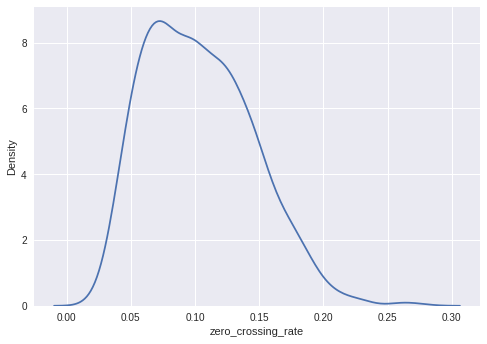

In [ ]:
sns.kdeplot(data=data, x='zero_crossing_rate')

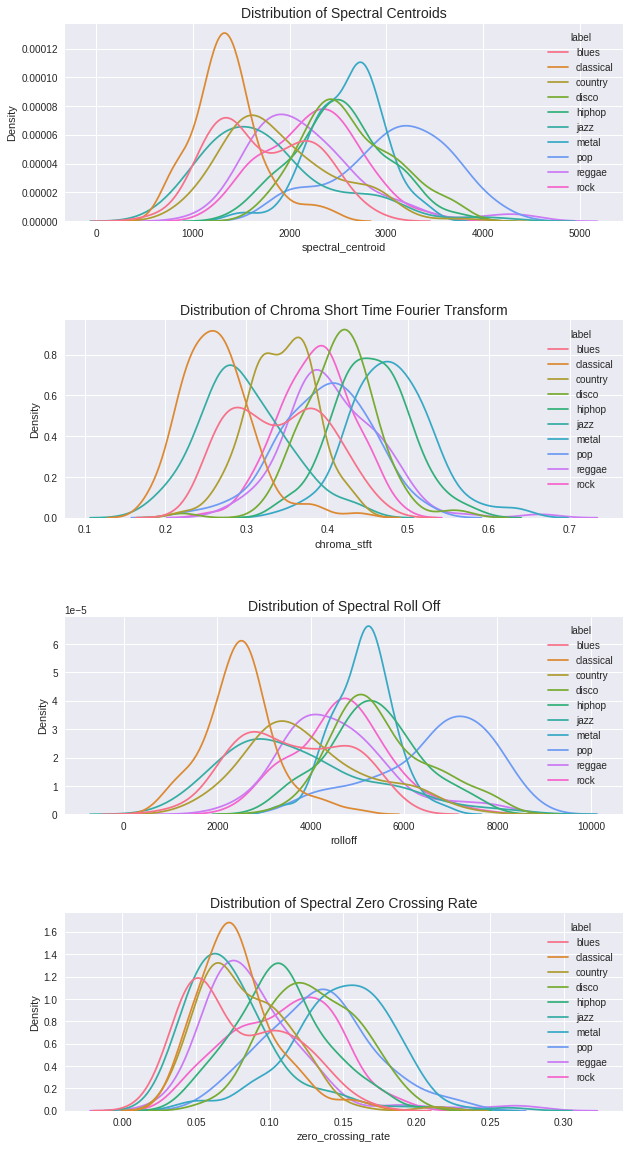

In [ ]:
fig, ax=plt.subplots(4,1, figsize=(10,20)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) #add space between subplots

#use seaborn to plot select features
sns.boxplot(data=data, x='spectral_centroid', hue='label', ax=ax[0])
sns.kdeplot(data=data, x='chroma_stft', hue='label', ax=ax[1])
sns.kdeplot(data=data, x='rolloff', hue='label', ax=ax[2])
sns.kdeplot(data=data, x='zero_crossing_rate', hue='label', ax=ax[3])

#set titles
ax[0].set_title('Distribution of Spectral Centroids', size=14)
ax[1].set_title('Distribution of Chroma Short Time Fourier Transform', size=14)
ax[2].set_title('Distribution of Spectral Roll Off', size=14);
ax[3].set_title('Distribution of Spectral Zero Crossing Rate', size=14);

Classical, Country, Jazz and even the Blues, tend more towards lower centroids, while Pop and Metal clearly tend towards the higher centroids.<br/>
The same tendencies as in the centroids is observed in the Chroma STFT, although the Zero Crossing Rate are certainly overlapping.

#####Outliers

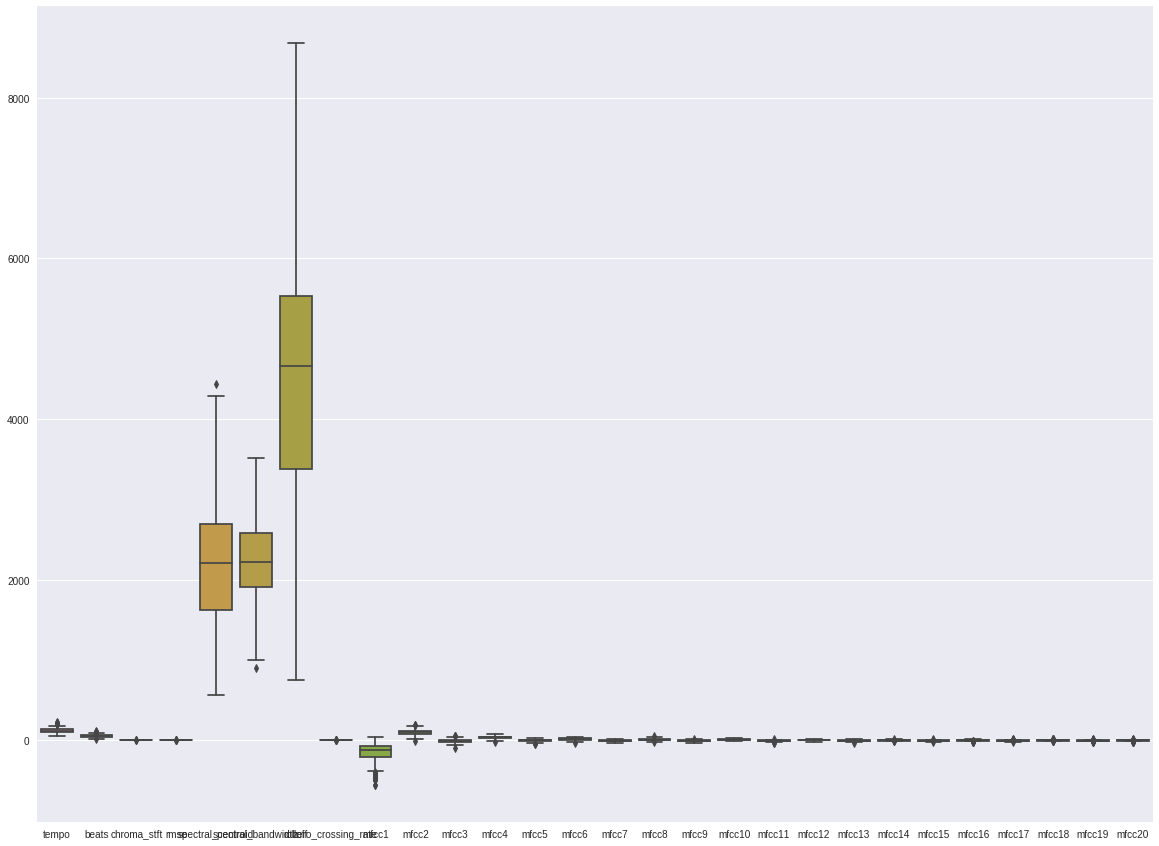

In [ ]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=data)

In [ ]:
#check for glocal outliers in each feature

data_num = data.iloc[:, 1:29] #save numerical columns in new variable

#solve for IQR
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


#Store new variables into dataframes.
#Create new Dataframes and define columns
l = pd.DataFrame(data=lower_bound, columns=['low_bound'])
u = pd.DataFrame(data=upper_bound, columns=['upp_bound'])

min = data_num.min()#minimum of column values
minimum = pd.DataFrame(data=min, columns=['min'])

max = data_num.max()#maximum of column values
maximum = pd.DataFrame(data=max, columns=['max'])


#merge new dataframes into one
#give random variable names leading to final one
k=l.join(minimum, how='outer')
d=k.join(u, how='outer')
outliers=d.join(maximum, how='outer')

#now check if there are outliers
def check(outliers):
    if outliers['min'] < outliers['low_bound'] or outliers['max'] > outliers['upp_bound']:
        print ('True')
    else:
        print ('False')
outliers['check'] = outliers.apply(check, axis=1)

True
True
True
True
True
True
False
True
True
True
True
True
True
True
False
True
True
False
True
False
True
True
True
True
True
True
True
True


In [ ]:
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,-1.146627,14.634083,-5.129624,10.119876,-6.995752,7.730251,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,12.222555,11.840802,9.941638,10.464090,8.284181,7.937977,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,-24.947537,-31.653059,-12.051190,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,-9.974552,5.097782,-12.870050,1.609752,-13.249849,1.621692,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,36.957074,-0.015239,15.007553,-5.717005,9.663922,-7.512299,7.151456,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,7.920911,23.857726,2.974185,18.708671,-0.383367,14.399350,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,80.691273,31.461661,45.173178,21.835769,49.018887,19.129207,27.216746,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


Majority of the features contain global outliers. 

#####Perform Correlation Analysis on Dataframe

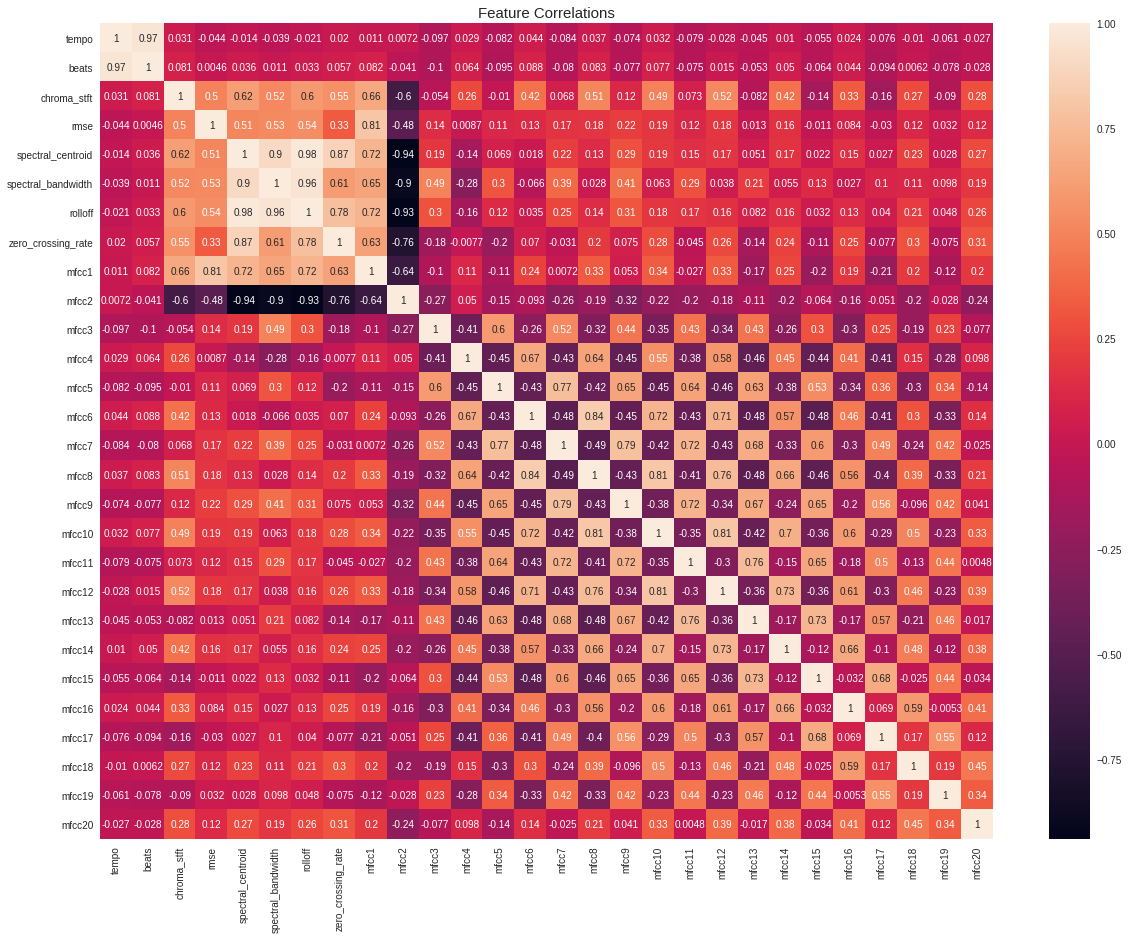

In [ ]:
#compute correlation
corr = data.corr() 

fig = plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.title('Feature Correlations', size=15);

The heat map above clearly shows that mfcc2 is highly correlated with the genres, and that a lot of colinearity exists between the other Mel-frequency cepstral coefficients.

###Genre Prediction

In [ ]:
#Extract features
X = data.iloc[:, 1:29].values
y = data.iloc[:, -1].values

In [ ]:
#define normalisation function
def normalize(transformer, data):
  scale = transformer
  result = scale.fit_transform(data)
  return result

In [ ]:
#Normalise Data before PCA
#test out two different scalers
Xss = normalize(StandardScaler(), X)
Xpt = normalize(PowerTransformer(), X) #renders the features as a gaussian distribution which is good for linear models

#####Proceed with determine **Dimensionality Reduction** case

Preferred choice of PCA over TSNE as it requires less need for domain knowledge.

Determine ideal number of components for PCA

In [ ]:
#define a pca function
def pca(n_components, data):
  pca = PCA(n_components)
  pca.fit(data)
  result = pca.transform(data)
  return pca, result

In [ ]:
n = len(data.columns) - 2 #total number of dependent variables
pca_full_ss = pca(n, Xss)
pca_full_pt = pca(n, Xpt)

In [ ]:
#how much variance is explained using all columns?
print('Standard Scaler: ', sum(pca_full_ss[0].explained_variance_ratio_ * 100))
print('Power Transformer: ', sum(pca_full_pt[0].explained_variance_ratio_ * 100))

Standard Scaler:  99.99999999999994
Power Transformer:  99.99999999999997


Variance explained by all 28 columns for both normalisers is 99.99%

**Standard Scaler PCA Assessment**

In [ ]:
#standard scaler pca
pca_full_ss[0].explained_variance_ratio_ * 100

array([3.00156034e+01, 2.37349557e+01, 9.71900272e+00, 6.95376039e+00,
       5.55144880e+00, 3.35874104e+00, 3.17784011e+00, 2.62665493e+00,
       1.93260077e+00, 1.63340928e+00, 1.39698372e+00, 1.22513401e+00,
       1.14951149e+00, 9.93138694e-01, 8.69294452e-01, 8.57960053e-01,
       7.91146018e-01, 7.51656287e-01, 6.67050029e-01, 6.08368187e-01,
       5.58399482e-01, 4.83341047e-01, 3.90221110e-01, 2.75369378e-01,
       1.29014740e-01, 1.03240434e-01, 3.58320462e-02, 1.03216053e-02])

In [ ]:
#standard scaler pca
np.cumsum(pca_full_ss[0].explained_variance_ratio_ * 100) #cummulative sum

array([ 30.01560344,  53.75055918,  63.4695619 ,  70.4233223 ,
        75.97477109,  79.33351213,  82.51135224,  85.13800716,
        87.07060793,  88.70401721,  90.10100093,  91.32613494,
        92.47564644,  93.46878513,  94.33807958,  95.19603964,
        95.98718565,  96.73884194,  97.40589197,  98.01426016,
        98.57265964,  99.05600069,  99.4462218 ,  99.72159117,
        99.85060591,  99.95384635,  99.98967839, 100.        ])

The first component alone explains 30% of the variability of the dataset.<br/>
The first **22** components keeps 99% of the variability. </br>
The **13th** component is the last one with eigenvalue > 1, explaining 92.47% variability which is still acceptable.

Text(0, 0.5, 'Explained variance')

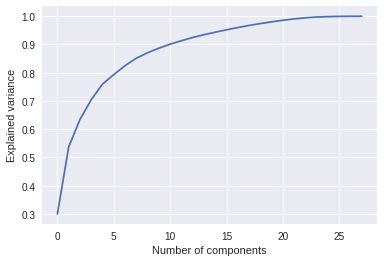

In [ ]:
# creating a plot using the cummulative sum of the above
plt.plot(np.cumsum(pca_full_ss[0].explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.title('Standard Scaler PCA Scree plot', size=15);

**Power Transformer PCA Assessment**

In [ ]:
#power transformer pca
pca_full_pt[0].explained_variance_ratio_ * 100

array([2.98133293e+01, 2.38493303e+01, 9.71306890e+00, 6.89200229e+00,
       5.65563724e+00, 3.40835711e+00, 3.24055088e+00, 2.57117231e+00,
       1.95278885e+00, 1.63465693e+00, 1.41555047e+00, 1.23725510e+00,
       1.14548318e+00, 1.02085312e+00, 8.84270148e-01, 8.68676432e-01,
       8.02685515e-01, 7.53432454e-01, 6.69756275e-01, 6.18461214e-01,
       5.59211673e-01, 4.30052988e-01, 3.10683631e-01, 2.53277217e-01,
       1.38911722e-01, 1.16076723e-01, 3.53246351e-02, 9.14334438e-03])

In [ ]:
#standard scaler pca
np.cumsum(pca_full_pt[0].explained_variance_ratio_ * 100) #cummulative sum

array([ 29.81332932,  53.66265966,  63.37572856,  70.26773085,
        75.92336809,  79.3317252 ,  82.57227608,  85.14344838,
        87.09623723,  88.73089416,  90.14644463,  91.38369973,
        92.52918291,  93.55003603,  94.43430618,  95.30298261,
        96.10566812,  96.85910058,  97.52885685,  98.14731807,
        98.70652974,  99.13658273,  99.44726636,  99.70054358,
        99.8394553 ,  99.95553202,  99.99085666, 100.        ])

The first component alone explains 29.81% of the variability of the dataset.<br/>
The first **22** components keeps 99% of the variability. </br>
The **14th** component is the last one with eigenvalue > 1, explaining 93.55% variability which is still acceptable.

Text(0, 0.5, 'Explained variance')

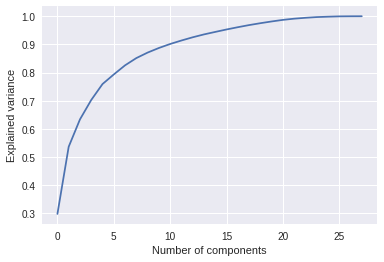

In [ ]:
# creating a plot using the cummulative sum of the above
plt.plot(np.cumsum(pca_full_pt[0].explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.title('Power Transformer PCA Scree plot', size=15);

**Adjusted PCAs**

In [ ]:
#using specific n
pca_ss = pca(17, Xss) #standard scaler
pca_pt = pca(16, Xpt) #power transformer

In [ ]:
#save components in a dataframe
ss_components = pd.DataFrame(pca_ss[1])
pt_components = pd.DataFrame(pca_pt[1])

#####Proceed with **KMeans** to visualise clusters using Training Data

**Standard Scaler**

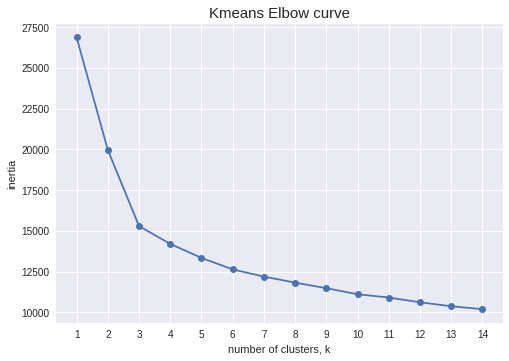

In [ ]:
#Standard Scaler
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(ss_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Kmeans Elbow curve', size=15);
plt.show()

The scree plot above shows a different pattern after the first 3 components. Confirm this number using the silhoutte score

In [ ]:
range_n_clusters = range(2, 9)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(ss_components)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = metrics.silhouette_score(ss_components, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(ss_components, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.2444309929084356
For n_clusters = 3 The average silhouette_score is : 0.28403253911013904
For n_clusters = 4 The average silhouette_score is : 0.2213192997744024
For n_clusters = 5 The average silhouette_score is : 0.2059687451214374
For n_clusters = 6 The average silhouette_score is : 0.1628214694082717
For n_clusters = 7 The average silhouette_score is : 0.15231495987209345
For n_clusters = 8 The average silhouette_score is : 0.129011499610682


In the above, 3 has the highest silhoutte score

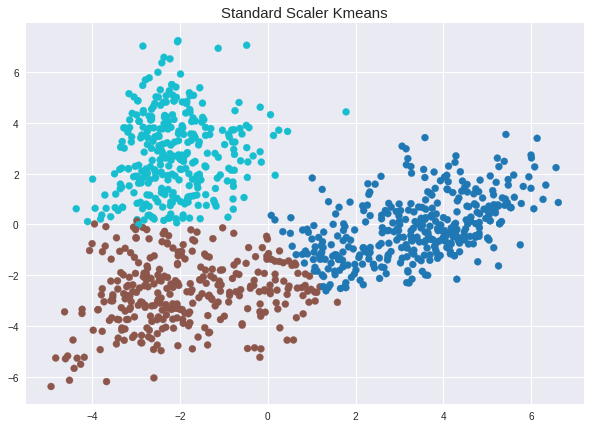

In [ ]:
#compute kmeans at n=3
k_means = KMeans(n_clusters=3)
genres = k_means.fit_predict(pca_ss[1])

#visualise clusters
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([pca_ss[1][:,0]], [pca_ss[1][:,1]], c=genres, cmap=cmap)
plt.title('Standard Scaler Kmeans', size=15);

In [ ]:
print(k_means.cluster_centers_)

[[-2.12541294e+00  2.78942579e+00  3.51023839e-01  3.72188243e-02
  -3.51305885e-02  4.79087192e-03  6.48770513e-02  5.70539724e-02
   1.39674702e-04 -1.68237967e-02 -8.81426292e-03 -9.38422793e-03
   2.15927538e-02 -6.77331968e-03 -2.80400565e-02  2.91957575e-02
   1.68519079e-02]
 [-1.87335773e+00 -2.69589983e+00 -1.35420370e-01  7.38524569e-02
   4.11673331e-02  9.10712168e-02 -1.22859895e-02 -7.62736832e-02
   2.20146872e-04  3.09129393e-02  5.73407393e-03  1.97199112e-02
  -2.76854607e-02  1.70145133e-02  2.40380260e-02 -5.08486993e-02
  -1.51850337e-04]
 [ 3.37801669e+00 -1.37925957e-01 -1.87218457e-01 -9.33598058e-02
  -4.27512392e-03 -7.99881034e-02 -4.52210903e-02  1.47894585e-02
  -3.02855069e-04 -1.13791501e-02  2.75637820e-03 -8.41125807e-03
   4.61289548e-03 -8.38866525e-03  3.93803745e-03  1.74162524e-02
  -1.42791213e-02]]


In [ ]:
print(k_means.labels_)

[2 1 1 1 2 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 2
 2 2 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 1 1
 2 1 1 2 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 1 0 1 1 0 1 0 2 1 0 0 1 1 2 1 0 1 0
 1 0 2 1 2 1 0 0 2 1 2 0 2 1 1 2 1 2 2 0 1 1 2 0 1 2 1 1 2 2 1 1 0 2 0 0 0
 2 1 1 1 1 1 2 1 1 0 2 2 2 0 1 1 1 1 2 2 2 0 1 1 2 1 2 1 1 1 1 1 2 2 1 2 1
 1 1 0 1 2 2 0 2 0 0 0 2 2 0 0 2 2 2 0 0 0 2 0 0 0 0 2 0 2 2 0 1 0 0 0 2 2
 2 0 0 2 2 2 0 0 2 2 2 0 0 2 0 1 2 0 0 2 0 2 0 1 0 2 0 2 2 2 2 2 0 0 2 2 2
 2 2 0 0 2 2 0 0 0 0 2 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2 0 2 0
 0 1 0 0 0 0 2 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 2 2 1 0 2 0 2 2 2 0 0
 0 1 2 2 2 0 2 2 2 2 0 2 0 1 0 2 2 0 2 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 2 2
 2 0 0 0 0 0 0 2 0 0 0 0 

In [ ]:
def k_labels(n):
  print(data[k_means.labels_==n]['label'].unique())

**Power Transformer**

Check to see if Power Transformer would give different clustering labels

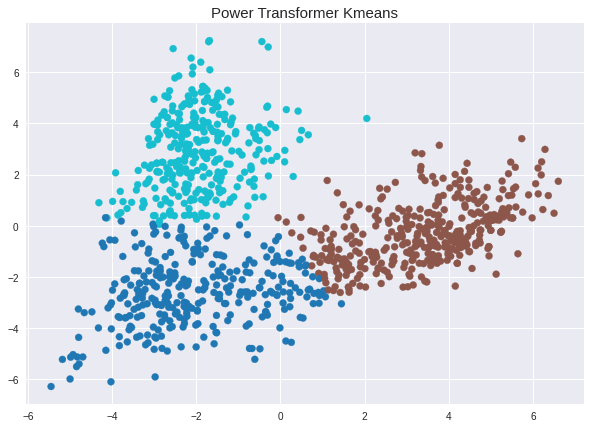

In [ ]:
#compute kmeans at n=3
k_means_pt = KMeans(n_clusters=3)
genres_pt = k_means_pt.fit_predict(pca_pt[1])

#visualise clusters
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([pca_pt[1][:,0]], [pca_pt[1][:,1]], c=genres_pt, cmap=cmap)
plt.title('Power Transformer Kmeans', size=15);

In [ ]:
print(k_means_pt.labels_)

[1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 0 2 0 0 2 0 2 1 0 2 2 0 0 1 0 2 0 2
 0 2 1 0 1 0 2 2 1 0 1 2 1 0 0 1 0 1 1 2 0 0 1 2 0 1 0 0 1 1 0 0 2 1 2 2 2
 1 0 0 0 0 0 1 0 0 2 1 1 1 2 0 0 0 0 1 0 1 2 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 2 0 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 1 2 1 1 2 0 2 2 2 1 1
 1 2 2 1 1 1 2 2 1 1 1 2 2 1 2 0 1 2 2 1 2 1 2 0 2 1 2 1 1 1 1 1 2 2 1 1 1
 1 1 2 2 1 1 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 1 2
 2 0 2 2 2 2 1 2 1 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 1 1 0 2 1 2 1 1 1 2 2
 2 0 1 1 1 2 1 1 1 1 2 1 2 0 2 1 1 2 1 2 1 2 2 2 1 1 2 1 1 1 2 2 1 1 2 1 1
 1 2 2 2 2 2 2 1 2 2 2 2 

View the labels on the data

In [ ]:
#Standard Scaler
print('1st cluster: ', k_labels(0))
print('')
print('2nd cluster: ', k_labels(1))
print('')
print('3rd cluster: ', k_labels(2))

['classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop' 'reggae'
 'rock']
1st cluster:  None

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'pop' 'reggae'
 'rock']
2nd cluster:  None

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'reggae'
 'rock']
3rd cluster:  None


In [ ]:
#Power Transformer
print('1st cluster: ', k_labels(0))
print('')
print('2nd cluster: ', k_labels(1))
print('')
print('3rd cluster: ', k_labels(2))

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'reggae'
 'rock']
1st cluster:  None

['classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop' 'reggae'
 'rock']
2nd cluster:  None

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'pop' 'reggae'
 'rock']
3rd cluster:  None


The results from the standard scaler and power transformer are very similar. Although the Kmeans plots with more components shows better division of the colours in the 3 clusters.

Visualising the distribution of each cluster's dataframes would give more insight into the pattern the kmeans algorithm used for clustering.

## Proceed with **Logistic Regression**

Make use of Principal Component

In [ ]:
#Train Test Split
#make use of stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
#set scalers
ss = StandardScaler()
pt = PowerTransformer()

Base Model

In [ ]:
#create workflow pipeline
model = LogisticRegression() #use the default settings of sklearn Logistic Regression. Multiclass already set to auto
pipeline = Pipeline(steps=[('normalise', ss), ('pca', PCA(n_components=22)), ('model', model)]) #use standard scaler 

In [ ]:
#fit pipeline to training data
pipeline.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=22,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

It is easy to see the parameters of the pipeline

In [ ]:
#predict the labels
y_pred = pipeline.predict(X_test)

#####Evaluate Logistic Regression model

In [ ]:
cm_base = metrics.confusion_matrix(y_test, y_pred) #Confusion matrix
print('f1_score: ', pipeline.score(X_test, y_test))
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', cm_base)

f1_score:  0.65
Accuracy Score:  0.65
Confusion Matrix:  [[17  1  1  3  0  1  3  0  2  2]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 5  0 18  3  0  2  0  0  0  2]
 [ 3  0  1 17  3  0  0  0  3  3]
 [ 0  1  2  1 19  0  0  3  4  0]
 [ 3  4  2  0  0 20  0  0  1  0]
 [ 1  0  0  2  2  0 25  0  0  0]
 [ 0  0  1  1  2  2  0 22  2  0]
 [ 0  0  3  0  4  2  0  2 18  1]
 [ 6  0  3  4  1  2  0  0  5  9]]


In [ ]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.6502007711995934

####Hyper tuned models

Run more logistic models with more specified tuning

In [ ]:
#preprocess y
le = LabelEncoder()
y_scaler = le.fit(y_train)

#transform targets
ytr_scaled = y_scaler.transform(y_train)
yte_scaled = y_scaler.transform(y_test);

In [ ]:
#define models
model_2 = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42) #guess work
model_3 = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42) #guess work

#define pipelines
pipeline_2 = Pipeline(steps=[('normalise', ss), ('pca', PCA(n_components=22)), ('m', model_2)]) #standard scaler
pipeline_3 = Pipeline(steps=[('normalise', pt), ('pca', PCA(n_components=23)), ('m', model_3)]) #power transformer

In [ ]:
# fit the pipeline on the transformed data
pipeline_2.fit(X_train, ytr_scaled)
pipeline_3.fit(X_train, ytr_scaled)
# make predictions
y_pred_2 = pipeline_2.predict(X_test)
y_pred_3 = pipeline_3.predict(X_test)

Evaluate New Models

**Standard Scaler**

In [ ]:
#standard scaler
cm_1 = metrics.confusion_matrix(yte_scaled, y_pred_2) #Confusion matrix
print('Accuracy Score: ', metrics.accuracy_score(yte_scaled, y_pred_2))
print('Confusion Matrix: ', cm_1)

f1_score:  0.65
Accuracy Score:  0.65
Confusion Matrix:  [[17  1  1  3  0  1  3  0  2  2]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 5  0 18  3  0  2  0  0  0  2]
 [ 3  0  1 17  3  0  0  0  3  3]
 [ 0  1  2  1 19  0  0  3  4  0]
 [ 3  4  2  0  0 20  0  0  1  0]
 [ 1  0  0  2  2  0 25  0  0  0]
 [ 0  0  1  1  2  2  0 22  2  0]
 [ 0  0  3  0  4  2  0  2 18  1]
 [ 6  0  3  4  1  2  0  0  5  9]]


In [ ]:
metrics.precision_score(yte_scaled, y_pred_2, average='weighted')

0.6502007711995934

In [ ]:
metrics.mean_absolute_error(yte_scaled, y_pred_2)

1.42

There is no visible improvement in the model after transforming the y variable. Most likely because the Logistic Regression above algorithm already had multiclass set to auto by default

**Power Transformer**

In [ ]:
metrics.mean_absolute_error(yte_scaled, y_pred_3)

1.2966666666666666

In [ ]:
#power transformer
cm_2 = metrics.confusion_matrix(yte_scaled, y_pred_3) #Confusion matrix
print('Accuracy Score: ', metrics.accuracy_score(yte_scaled, y_pred_3))
print('Confusion Matrix: ', cm_2)

f1_score:  0.6166666666666667
Accuracy Score:  0.6166666666666667
Confusion Matrix:  [[12  2  4  4  0  2  3  0  2  1]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 6  0 18  4  0  1  0  0  0  1]
 [ 2  0  1 15  5  0  0  0  3  4]
 [ 0  1  2  1 17  0  0  2  7  0]
 [ 3  4  3  0  0 19  0  0  1  0]
 [ 2  0  0  2  2  0 24  0  0  0]
 [ 0  1  1  1  3  1  0 21  2  0]
 [ 0  0  3  0  4  1  0  2 18  2]
 [ 5  0  3  3  1  2  0  0  5 11]]


####Review Confusion of Metric of Best Model

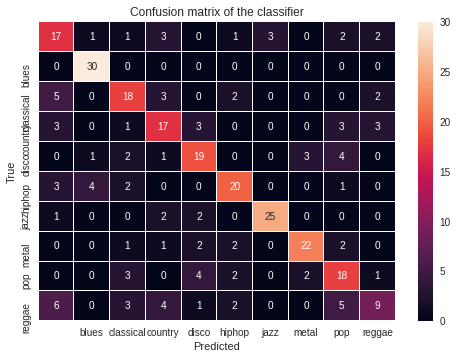

In [ ]:
#Standard Scaler, Label Encoded target, Hypertuned Logistic Regression
labels = data.iloc[:, -1].unique().tolist()
cm = metrics.confusion_matrix(le.inverse_transform(yte_scaled), le.inverse_transform(y_pred_2), labels)
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, linewidths = 0.01)

plt.title('Confusion matrix of the classifier')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

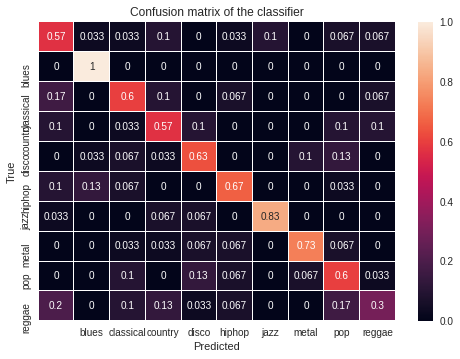

In [ ]:
#Normalised Confusion Matrix
labels = data.iloc[:, -1].unique().tolist()
cm = metrics.confusion_matrix(le.inverse_transform(yte_scaled), le.inverse_transform(y_pred_2), labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)

plt.title('Confusion matrix of the classifier')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The above heatmap shows that Blues music is a perfect prediction with a value of 1, followed by Jazz with 0.83.<br/>
This is very similar to the confusion matrix values before normalisation. This is because of the balanced distribution of the Genres in the data set.

###Summary

Having 10 music Genres to predict: <br/>
The different genres showed clear differences in distibution when assessed across the frequency content of its spectrum.

The Kmeans clustering algorithm was best able to group the music files into 3 genres.

The Logistic Regression model was best able to predict Blues, Jazz and Metal, music, more than the others.
